In [ ]:
import plotly as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob

#https://www.kaggle.com/datasets/crainbramp/steam-dataset-2025-multi-modal-gaming-analytics
df = pd.read_csv('data/applications.csv', usecols=['appid', 'name', 'type','release_date','metacritic_score', 'recommendations_total',
                                                   'mat_final_price','mat_currency', 'mat_achievement_count'], low_memory=False)


df1 = pd.read_csv("data/application_categories.csv")
df2 = pd.read_csv("data/application_developers.csv")
df3 = pd.read_csv("data/application_genres.csv")
df4 = pd.read_csv("data/application_platforms.csv")
df5 = pd.read_csv("data/application_publishers.csv")

In [ ]:
#for Later
#dfkey1 = pd.read_csv("data2/categories.csv")
#dfkey2 = pd.read_csv("data2/developers.csv")
#dfkey3 = pd.read_csv("data2/genres.csv")
#dfkey4 = pd.read_csv("data2/platforms.csv")
#dfkey5 = pd.read_csv("data2/publishers.csv")

In [ ]:

#first file too big for github right now
#df_id = pd.read_csv('data3/games_march2025_cleaned.csv', usecols=['appid', 'name', 'release_date', 'price', 'developers', 'publishers', 'categories', 'genres', 'positive', 'negative', 'peak_ccu', 'pct_pos_total','num_reviews_total'], low_memory=False)
#Top 100,000 sold games March 2025
df_best = pd.read_csv('data3/gamalytic_steam_games.csv', low_memory=False).rename(columns={'steamId' : 'appid'})
#usecols= ['steamId', 'price', 'copiesSold', 'publisherClass', 'reviewScore']

In [ ]:
df_best['sale_revenue'] = df_best['price'] * df_best['copiesSold']
df_best.head(20)


In [ ]:
avg = df_best['price'].mean()
publishers = df_best['publisherClass'].value_counts()	
free = (df_best['price'] == 0).sum()
more5 = (df_best['price'] > 5).sum()
maxcost = (df_best['price']).max()

print('Average Cost', avg)
print(publishers)
print('count of free:', free)
print('More than 5:', more5)
print('Max:', maxcost)
print(df_best.shape[0])

In [ ]:
grouped = df_best.groupby("publisherClass")["price"].mean().sort_values(ascending=False)
print(grouped_publisher)
grouped_publisherC = df_best.groupby("publisherClass").count().reset_index()
print(grouped_publisherC)

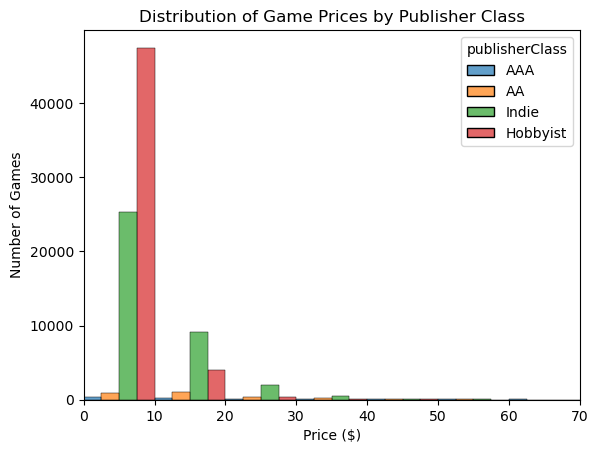

In [84]:
figsize=(12,6)

bins = np.arange(0, 260, 10)
sns.histplot(data=df_best, x="price", hue="publisherClass", 
    bins=bins, stat='count', multiple="dodge", hue_order=['AAA', 'AA', 'Indie', 'Hobbyist'],
    alpha=0.7
)

plt.xlim(0, 70)
plt.title("Distribution of Game Prices by Publisher Class")
plt.xlabel("Price ($)")
plt.ylabel("Number of Games")
plt.show()